In [1]:
source("../BrusselSprouts/scripts/functions.R")


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
chris_crosses=data.frame(sample1=c("ACP","BAP","CCD","ATE","ACK","AKE","BAH","ANG"),
                        sample2=c("BFP","CMP","CPG","YCR","ACV","BAH","CGD","CEI"))

In [3]:
SV_filter=readLines("~/data/TRD/long_read_Andreas/goodStrains.list")
Matrix_filter=readLines("~/data/TRD/SamplesInMatrix.list")
polyploidy_filter=readLines("~/data/TRD/AD/notPolyploid.list")
distance_filter=fread("~/data/TRD/distant_comparisons.csv", data.table=FALSE)
asd2d_data=fread("~/data/TRD/asd_2d.csv", data.table=FALSE)

In [4]:
#SACE prefixed IDs are not in Matrix
summary(str_replace(polyploidy_filter[startsWith(polyploidy_filter, "SACE")],fixed("SACE_"),"") %in% Matrix_filter)
summary(polyploidy_filter[startsWith(polyploidy_filter, "SACE")] %in% Matrix_filter)

   Mode   FALSE 
logical      87 

   Mode   FALSE 
logical      87 

In [5]:
library(readxl)
Ecology=read_xlsx("/home/jnrunge/1002_strains_total_dataset.xlsx", sheet = "final_1002_site")
head(Ecology)

Standard ID,Strain Name,Ecological origin,Geographical Origin
<chr>,<chr>,<chr>,<chr>
CRI,AGME 5I,Wine,Italy
CEN,ATCC 38618:2-2,Concentrated orange juice,NA
CEP,ATCC 52922-1C,Tapuy (rice wine),Philippines
CDB,ATCC 66348-1D,Soil,Japan
ANN,AY529516,Soil beneath Quercus velutina,Ghana
BMF,269521J,Human,"RVI Newcastle, UK"


In [6]:
library(VennDiagram)
display_venn <- function(x, ...){
  library(VennDiagram)
  grid.newpage()
  venn_object <- venn.diagram(x, filename = NULL, ...)
  grid.draw(venn_object)
}

Loading required package: grid

Loading required package: futile.logger



In [7]:
summary(unique(c(distance_filter$row,distance_filter$col))%in%SV_filter)
summary(unique(c(distance_filter$row,distance_filter$col))%in%Matrix_filter)
summary(unique(c(distance_filter$row,distance_filter$col))%in%polyploidy_filter)

   Mode   FALSE    TRUE 
logical     998      13 

   Mode   FALSE    TRUE 
logical     953      58 

   Mode   FALSE    TRUE 
logical     160     851 

In [8]:
all_comparisons=fread("~/data/TRD/comparisons.csv")
all_comparisons=subset(all_comparisons, 
                       row%in%Matrix_filter & row%in%polyploidy_filter & 
                      #col%in%SV_filter & row %in% SV_filter &
                       col%in%Matrix_filter & col%in%polyploidy_filter & dist!=0)

In [9]:
summary(all_comparisons$dist)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000081 0.027512 0.035955 0.032908 0.043575 0.053588 

In [10]:
all_comparisons=left_join(all_comparisons,subset(Ecology, select=c("Standard ID","Ecological origin","Geographical Origin")),
                          by=c("row"="Standard ID"))
                          all_comparisons=left_join(all_comparisons,subset(Ecology, select=c("Standard ID","Ecological origin","Geographical Origin")),
                          by=c("col"="Standard ID"))
all_comparisons

row,col,dist,Ecological origin.x,Geographical Origin.x,Ecological origin.y,Geographical Origin.y
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
AAR,AAM,0.025973,Beer,Ireland,Bakery,France
AAS,AAM,0.031082,AIDS patient,USA,Bakery,France
AAV,AAM,0.032335,Blood,"California, USA",Bakery,France
ABA,AAM,0.033094,"Human, clinical","California, USA",Bakery,France
ABC,AAM,0.034739,Ascites fluid,USA,Bakery,France
ABE,AAM,0.022300,"Human, clinical",Europe,Bakery,France
ABG,AAM,0.031679,"Human, clinical",NA,Bakery,France
ABK,AAM,0.031216,"Human, clinical",NA,Bakery,France
ABL,AAM,0.042699,Soil,South Africa,Bakery,France


In [11]:
all_comparisons=subset(all_comparisons, dist>0.03)
all_comparisons$dup=NA
for(i in 1:nrow(all_comparisons)){
    all_comparisons$dup[i]=which(paste(all_comparisons$col,all_comparisons$row) == paste(all_comparisons$row[i],all_comparisons$col[i]))
}
all_comparisons$nrow=1:nrow(all_comparisons)
all_comparisons=all_comparisons[all_comparisons$dup < all_comparisons$nrow,]
nrow(all_comparisons)

[1] 1101

In [12]:
IDs=unique(c(all_comparisons$row,all_comparisons$col))
length(IDs)

[1] 58

In [13]:
summary(paste(all_comparisons$row,all_comparisons$col) %in%
       c(paste(chris_crosses$sample1,chris_crosses$sample2),paste(chris_crosses$sample2,chris_crosses$sample1)))

   Mode   FALSE    TRUE 
logical    1100       1 

In [14]:
IDs_dup<-unique(c(chris_crosses$sample1,chris_crosses$sample2))[unique(c(chris_crosses$sample1,chris_crosses$sample2)) %in% IDs]

In [15]:
IDs=IDs[!(IDs%in%IDs_dup)]
IDs

[1] "AAM" "AAR" "AAS" "AAV" "ABA" "ABC" "ABE" "ABG" "ABK" "ABL" "ABP" "ABS"
[13] "ACI" "ACN" "ACT" "AKH" "AKI" "AKS" "AKQ" "AKV" "AMD" "AMM" "AND" "ANH"
[25] "ANI" "AVI" "BAK" "BAN" "BBQ" "BBS" "BEF" "BET" "BEV" "BFC" "BFD" "BFQ"
[37] "BFR" "BHN" "BID" "BKL" "BMK" "BQC" "BTI" "CCC" "CCF" "CCG" "CMQ" "CRB"

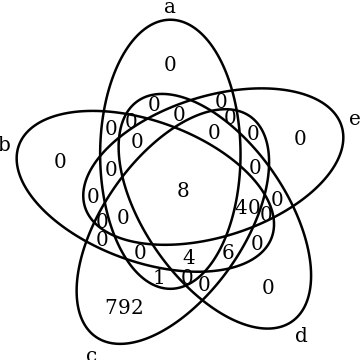

In [16]:
x=list(a=SV_filter,b=Matrix_filter,c=polyploidy_filter,d=unique(c(all_comparisons$row,all_comparisons$col)),e=IDs)
options(repr.plot.width=3, repr.plot.height=3)
display_venn(x)

In [17]:
all_comparisons=subset(all_comparisons, col%in%IDs & row%in%IDs)
all_comparisons

,row,col,dist,Ecological origin.x,Geographical Origin.x,Ecological origin.y,Geographical Origin.y,dup,nrow
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
115,AAM,AAS,0.031082,Bakery,France,AIDS patient,USA,1,65
172,AAM,AAV,0.032335,Bakery,France,Blood,"California, USA",2,96
173,AAR,AAV,0.030756,Beer,Ireland,Blood,"California, USA",34,97
229,AAM,ABA,0.033094,Bakery,France,"Human, clinical","California, USA",3,129
230,AAR,ABA,0.031598,Beer,Ireland,"Human, clinical","California, USA",35,130
286,AAM,ABC,0.034739,Bakery,France,Ascites fluid,USA,4,161
287,AAR,ABC,0.035012,Beer,Ireland,Ascites fluid,USA,36,162
288,AAS,ABC,0.032483,AIDS patient,USA,Ascites fluid,USA,66,163
289,AAV,ABC,0.033039,Blood,"California, USA",Ascites fluid,USA,98,164


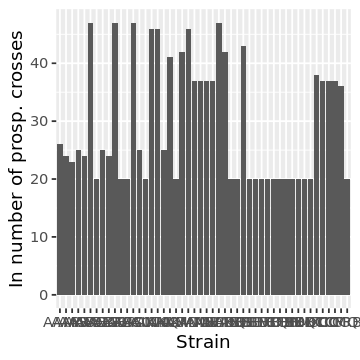

In [18]:
ggplot(mapping=aes(c(all_comparisons$row,all_comparisons$col)))+
geom_bar()+
xlab("Strain")+
ylab("In number of prosp. crosses")

In [19]:
all_comparisons=all_comparisons[order(all_comparisons$dist,decreasing = TRUE),]

In [20]:
all_comparisons$unique=FALSE
for(i in 1:nrow(all_comparisons)){
    if(i == 1){
        all_comparisons$unique[i]=TRUE
    }else{
        all_comparisons_unique=all_comparisons[1:(i-1),]
        all_comparisons_unique=subset(all_comparisons_unique, unique==TRUE)
        previous_IDs=unique(c(all_comparisons_unique$row,all_comparisons_unique$col))
        if(!(all_comparisons$row[i] %in% previous_IDs) & !(all_comparisons$col[i] %in% previous_IDs)){
            all_comparisons$unique[i]=TRUE
        }
    }
}

In [21]:
all_comparisons_unique=subset(all_comparisons, unique==TRUE)
all_comparisons_unique

,row,col,dist,Ecological origin.x,Geographical Origin.x,Ecological origin.y,Geographical Origin.y,dup,nrow,unique
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<lgl>
2755,AKH,BQC,0.050212,Palm wine,Nigeria,Cognac,"Cognac, France",711,1820,TRUE
2064,ABS,BEF,0.048522,Cocoa beans,NA,Fermenting rice,China,412,1478,TRUE
2711,BAK,BMK,0.047953,"Bark, Quercus wutaishanica","Dongling Mountain, Beijing, china",Clinical,USA,1304,1804,TRUE
3282,BAN,CRB,0.047348,Rotten wood,"Wuzhi Mountain, Hainan province, China",Wine,Italy,1363,2193,TRUE
2647,AMM,BKL,0.046791,Leaf of Trema orientalis,"Beinan, Taitung, Taiwan",Grape must,"Dolianova, Sardinia, Italy",977,1770,TRUE
520,ABE,ABL,0.045746,"Human, clinical",Europe,Soil,South Africa,218,315,TRUE
3004,BFC,CCF,0.045163,Kefyr,Slovenia,Termite mound,"Yasuni, Orellana",1595,2004,TRUE
2896,BID,CCC,0.045113,Baker's yeast,"Pazzaglia, Italy","Flower, Gesneriaceae sp.","Yasuni, Orellana",1755,1924,TRUE
3038,ACT,CCG,0.045073,Wine,South Africa,Decaying fruit,"Yasuni, Orellana",610,2032,TRUE


In [22]:
IDs=IDs[IDs%in%c(all_comparisons_unique$row,all_comparisons_unique$col)]

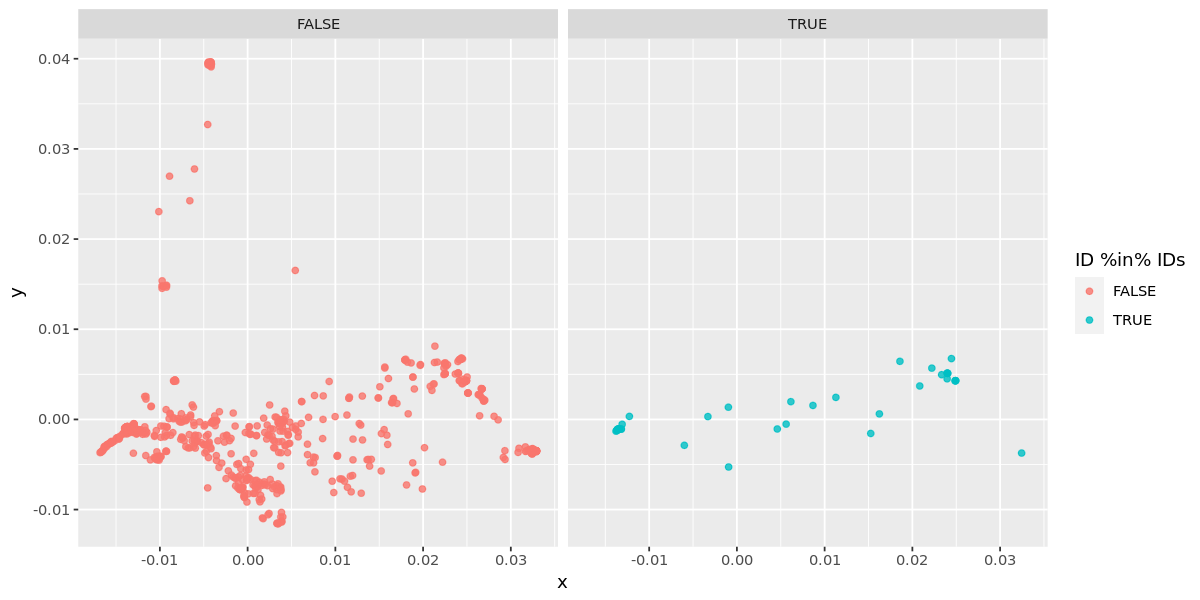

In [23]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(asd2d_data, aes(x,y,color=ID%in%IDs))+
geom_point(alpha=0.8)+
facet_wrap(~(ID%in%IDs))

In [24]:
# Ecology

summarise(group_by(filter(Ecology, `Standard ID`%in%IDs), `Geographical Origin`),n=n())
summarise(group_by(filter(Ecology, `Standard ID`%in%IDs), `Ecological origin`),n=n())

Geographical Origin,n
<chr>,<int>
Austria,1
"Beinan, Taitung, Taiwan",1
"Brittany, France",2
"California, USA",1
China,1
"Cognac, France",1
"Dolianova, Sardinia, Italy",1
"Dongling Mountain, Beijing, china",1
"Dongpu, Sinyi Township, Nantou, Taiwan",1


Ecological origin,n
<chr>,<int>
Ascites fluid,1
Baker's yeast,1
Bakery,1
Banana wine,1
"Bark, Quercus wutaishanica",1
Beer,1
Beetle,1
Bili wine,1
"Cider brewery, industrial raw juice",2


In [25]:
summarise(group_by(filter(Ecology, `Standard ID`%in%IDs), `Geographical Origin`, `Ecological origin`),n=n())


`summarise()` has grouped output by 'Geographical Origin'. You can override using the `.groups` argument.



Geographical Origin,Ecological origin,n
<chr>,<chr>,<int>
Austria,Red Blauer Portugieser grapes,1
"Beinan, Taitung, Taiwan",Leaf of Trema orientalis,1
"Brittany, France","Cider brewery, industrial raw juice",2
"California, USA","Human, clinical",1
China,Fermenting rice,1
"Cognac, France",Cognac,1
"Dolianova, Sardinia, Italy",Grape must,1
"Dongling Mountain, Beijing, china","Bark, Quercus wutaishanica",1
"Dongpu, Sinyi Township, Nantou, Taiwan",Fruiting body of Geastrum sp.,1


# Would the best case so far be filtered out?

In [26]:
"BAH" %in% SV_filter # not tested
"BAH" %in% Matrix_filter
"BAH" %in% polyploidy_filter

"CGD" %in% SV_filter # filtered out
"CGD" %in% Matrix_filter
"CGD" %in% polyploidy_filter

[1] FALSE

[1] FALSE

[1] TRUE

[1] FALSE

[1] FALSE

[1] TRUE